In [1]:
pip install openpyxl

In [2]:
pip install soynlp emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 16.1 MB/s eta 0:00:00


In [3]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

ham, spam

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

data = pd.read_csv("/content/drive/MyDrive/데이터과학/week14/test_data_set.csv", encoding="utf-8")
print('total samples : ', len(data))

total samples :  11979


In [5]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


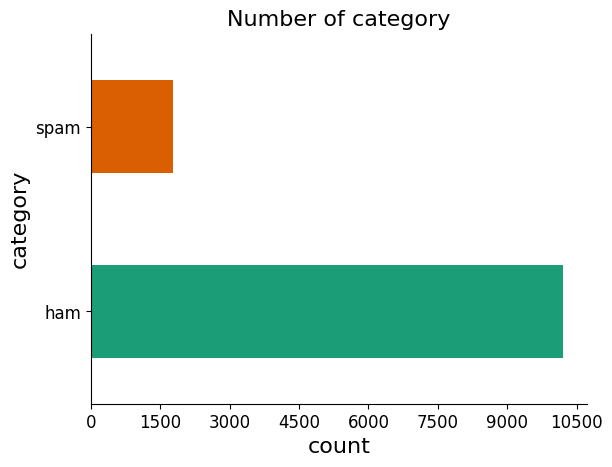

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

values = data["v1"].value_counts()
values.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Number of category", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("category", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [7]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

<ipython-input-7-100415b19030>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
print('결측값 여부 :',data.isnull().values.any())
print('v2열의 유니크한 값 :',data['v2'].nunique())
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

결측값 여부 : False
v2열의 유니크한 값 : 10859
총 샘플의 수 : 10859


In [9]:
spam = data['v1'].value_counts()[1]
ham = data['v1'].value_counts()[0]
print(spam, ham)

1669 9190


In [10]:
print('ham과 spam의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

ham과 spam의 개수
   v1  count
0   0   9190
1   1   1669


In [11]:
ham_ratio = round(spam/len(data)*100,3)
spam_ratio = round(ham/len(data)*100,3)
print(ham_ratio)
print(spam_ratio)

print(f'정상 문자 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 문자 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

15.37
84.63
정상 문자 비율 = 84.63%
스팸 문자 비율 = 15.37%


In [12]:
X_data = data['v2']
y_data = data['v1']
print('문자열 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

문자열 본문의 개수: 10859
레이블의 개수: 10859


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
print(X_train.shape)
print(y_train.shape)

(8687,)
(8687,)


In [14]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 문자 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 문자 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 문자 = 84.632%
스팸 문자 = 15.368%


In [15]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 문자 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 문자 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 문자 = 84.622%
스팸 문자 = 15.378%


In [16]:
print('--------훈련 데이터-----------')
print(X_train[:10])
print('--------테스트 데이터-----------')
print(X_test[:10])

--------훈련 데이터-----------
9723                                           랄로 왜 메랜 안함?
10927                                 역시 색다른 메뉴가 있으면 좋은듯..
2710     Hope you enjoyed your new content. text stop t...
7895                                    t1 경기 사이에 보는게 맛있긴해
8028     ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도...
2838     Easy mate, * guess the quick drink was bit amb...
7499                                                치감대 ㅎㅇ
6320                        디지털 카메라의 기준은 하나다! 캐논인가 캐논이 아닌가
6402                                      PC는 달라도 모니터는 샘트론
761      We are at grandmas. Oh dear, u still ill? I fe...
Name: v2, dtype: object
--------테스트 데이터-----------
10934            26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!
3447     Its  &lt;#&gt; k here oh. Should i send home f...
2471                 sry can't talk on phone, with parents
6631                              에헤에 암살부분 나레이션 맘에등어서 구독!!
1288                              Happy new year to u too!
6312                                  

In [17]:
X_train = [clean(x) for x in X_train]

In [18]:
print(X_train[:10])
print(y_train[:10])

['랄로 왜 메랜 안함?', '역시 색다른 메뉴가 있으면 좋은듯..', 'Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p Provided by tones2you.co.uk', 't1 경기 사이에 보는게 맛있긴해', 'ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도도 ㅈ같네 하면서 안하는게ㅋㅋㅌ걍 쏴', 'Easy mate, * guess the quick drink was bit ambitious.', '치감대 ㅎㅇ', '디지털 카메라의 기준은 하나다! 캐논인가 캐논이 아닌가', 'PC는 달라도 모니터는 샘트론', 'We are at grandmas. Oh dear, u still ill? I felt Shit this morning but i think i am just hungover! Another night then. We leave on sat.']
9723     0
10927    0
2710     1
7895     0
8028     0
2838     0
7499     0
6320     1
6402     1
761      0
Name: v1, dtype: int64


In [19]:
X_test = [clean(x) for x in X_test]

In [20]:
print(X_test[:10])
print(y_test[:10])

['26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!', 'Its &lt;#&gt; k here oh. Should i send home for sale.', "sry can't talk on phone, with parents", '에헤에 암살부분 나레이션 맘에등어서 구독!!', 'Happy new year to u too!', '한번만 씻어봐도 아는 깨끗함', 'All day working day:)except saturday and sunday..', 'URGENT! Your mobile number *************** WON a 2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm', 'I see the letter B on my car', 'Hi, wkend ok but journey terrible. Wk not good as have huge back log of marking to do']
10934    0
3447     0
2471     0
6631     0
1288     0
6312     1
3468     0
2327     1
37       0
2285     0
Name: v1, dtype: int64


문장의 최대 길이 : 790
문장의 평균 길이 : 52.41257050765512


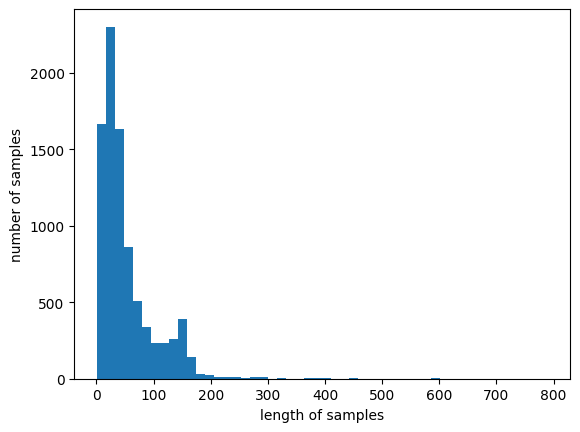

In [21]:
print('문장의 최대 길이 :',max(len(review) for review in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

문장의 최대 길이 : 910
문장의 평균 길이 : 54.8195211786372


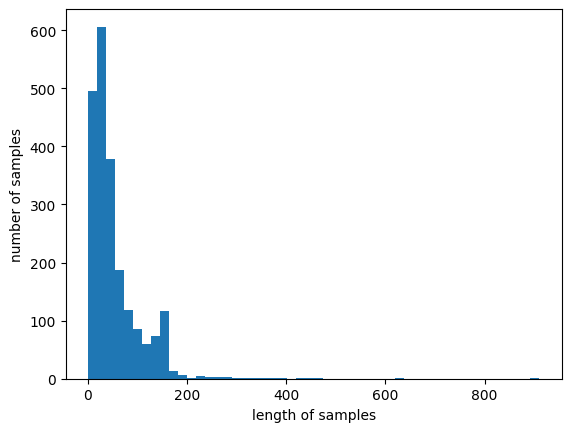

In [22]:
print('문장의 최대 길이 :',max(len(review) for review in X_test))
print('문장의 평균 길이 :',sum(map(len, X_test))/len(X_test))
plt.hist([len(review) for review in X_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [24]:
max_len = 128
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 128 이하인 샘플의 비율: 89.45550823068955


In [25]:
max_len = 128
below_threshold_len(max_len, X_test)

전체 샘플 중 길이가 128 이하인 샘플의 비율: 88.95027624309392


In [26]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base-v2022")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/504 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

ham, spam

In [27]:
train_sentences = X_train
train_labels = y_train

test_sentences = X_test
test_labels = y_test

In [28]:
print(train_sentences[:5])
print(train_labels[:5])

print(test_sentences[:5])
print(test_labels[:5])

['랄로 왜 메랜 안함?', '역시 색다른 메뉴가 있으면 좋은듯..', 'Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p Provided by tones2you.co.uk', 't1 경기 사이에 보는게 맛있긴해', 'ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도도 ㅈ같네 하면서 안하는게ㅋㅋㅌ걍 쏴']
9723     0
10927    0
2710     1
7895     0
8028     0
Name: v1, dtype: int64
['26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!', 'Its &lt;#&gt; k here oh. Should i send home for sale.', "sry can't talk on phone, with parents", '에헤에 암살부분 나레이션 맘에등어서 구독!!', 'Happy new year to u too!']
10934    0
3447     0
2471     0
6631     0
1288     0
Name: v1, dtype: int64


ham, spam

In [29]:
tokenized_train_data = tokenizer(
    train_sentences,
    padding=True,          # 문장을 최대 길이에 맞게 패딩
    truncation=True,       # 최대 길이를 초과하면 잘라냄
    max_length=128,        # 최대 길이 설정 (필요에 따라 변경 가능)
    return_tensors="tf"    # TensorFlow 텐서 형식으로 반환
)

tokenized_test_data = tokenizer(
    test_sentences,
    padding=True,          # 문장을 최대 길이에 맞게 패딩
    truncation=True,       # 최대 길이를 초과하면 잘라냄
    max_length=128,        # 최대 길이 설정 (필요에 따라 변경 가능)
    return_tensors="tf"    # TensorFlow 텐서 형식으로 반환
)

In [30]:
print("Input IDs:", tokenized_train_data["input_ids"][:5])
print("Attention Masks:", tokenized_train_data["attention_mask"][:5])

Input IDs: tf.Tensor(
[[    2  1616  4101  2607  1806  4825 14999    33     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    2  8237 39910 21909  4045  8640  8213  4230    18    18     3     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0  

In [31]:
print(tokenizer.decode(tokenized_train_data["input_ids"][2]))

[CLS] Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help : 08712400602450p Provided by tones2you. co. uk [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [32]:
print("Input IDs:", tokenized_test_data["input_ids"][:5])
print("Attention Masks:", tokenized_test_data["attention_mask"][:5])

Input IDs: tf.Tensor(
[[    2 15721 25111 27599  8229  2311  4146  8733  4176  8407 18646    18
   9170  1109  8241 13683 43421     5     3     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    2 44728  4571    10 10048    31     7    10  8524    31    77 44867
  11575    81  4545    18 38740 40724  4642    75 16211 25960 52459  4287
  36784    85 43341    18     3     0  

In [33]:
print(type(tokenized_train_data["input_ids"]))
print(type(tokenized_test_data["input_ids"]))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [34]:
import tensorflow as tf

train_labels = tf.convert_to_tensor(y_train)
test_labels = tf.convert_to_tensor(y_test)

print(train_labels[:10])
print(test_labels[:10])

tf.Tensor([0 0 1 0 0 0 0 1 1 0], shape=(10,), dtype=int64)
tf.Tensor([0 0 0 0 0 1 0 1 0 0], shape=(10,), dtype=int64)


In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from transformers import TFElectraForSequenceClassification, TFElectraModel


electra_model = TFElectraModel.from_pretrained("beomi/KcELECTRA-base-v2022", from_pt=True)

class KcElectraLayer(Layer):
    def __init__(self, electra_model, **kwargs):
        super(KcElectraLayer, self).__init__(**kwargs)
        self.electra  = electra_model
        self.electra.trainable = False

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state[:, 0, :]  # [CLS] 토큰에 해당하는 출력 반환

    def get_config(self):
        # Hugging Face 모델 경로 또는 이름을 저장
        config = super().get_config()
        config.update({
            "electra_model_name": self.electra.name_or_path  # 모델의 이름 또는 경로 저장
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Hugging Face 모델을 재로드
        from transformers import TFElectraModel
        electra_model = TFElectraModel.from_pretrained(config["electra_model_name"])
        return cls(electra_model=electra_model)


pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraModel: ['discriminator_predictions.dense_prediction.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing TFElectraModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFElectraModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further train

In [141]:
def build_kc_electra_model(electra_model, max_len, num_classes):

    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    electra_layer = KcElectraLayer(electra_model)
    cls_output = electra_layer((input_ids, attention_mask))

    dropout1 = Dropout(0.3)(cls_output)
    x = Dense(256, activation='swish', kernel_initializer='he_normal')(dropout1)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='swish', kernel_initializer='he_normal')(x)
    output = Dense(num_classes, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

In [142]:
num_classes = 1
max_len = 128
model = build_kc_electra_model(electra_model, max_len, num_classes)

In [143]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ kc_electra_layer_7        │ (None, 768)            │              0 │ input_ids[0][0],       │
│ (KcElectraLayer)          │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 768)            │              0 │ kc_electra_layer_7[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 256)            │        196,864 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 256)            │              0 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 32)             │          8,224 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 1)              │             33 │ dense_18[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 205,121 (801.25 KB)

 Trainable params: 205,121 (801.25 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:

optimizer = tf.keras.optimizers.AdamW(
    learning_rate=2e-4,  # 학습률
    weight_decay=0.01    # weight decay (L2 regularization)
)
model.compile(optimizer='nadam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
# binary_crossentropy, categorical_crossentropy
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

history = model.fit([tokenized_train_data["input_ids"], tokenized_train_data["attention_mask"]],
                    train_labels, epochs=10, batch_size=8, callbacks=[es, lr],
                    validation_split=0.2, shuffle=True,
                    validation_freq = 1)

Epoch 1/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 122s 117ms/step - accuracy: 0.8865 - loss: 0.2967 - val_accuracy: 0.9264 - val_loss: 0.1882 - learning_rate: 0.0010
Epoch 2/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.9260 - loss: 0.1953 - val_accuracy: 0.9540 - val_loss: 0.1394 - learning_rate: 0.0010
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 73s 71ms/step - accuracy: 0.9453 - loss: 0.1533 - val_accuracy: 0.9545 - val_loss: 0.1354 - learning_rate: 0.0010
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 90s 81ms/step - accuracy: 0.9516 - loss: 0.1371 - val_accuracy: 0.9638 - val_loss: 0.1228 - learning_rate: 0.0010
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 73s 71ms/step - accuracy: 0.9533 - loss: 0.1265 - val_accuracy: 0.9597 - val_loss: 0.1293 - learning_rate: 0.0010
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 91s 81ms/step - accuracy: 0.9610 - loss: 0.1065 - val_accuracy: 0.9643 - val_loss: 0.1211 - learning_rate: 0.0010
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9648 

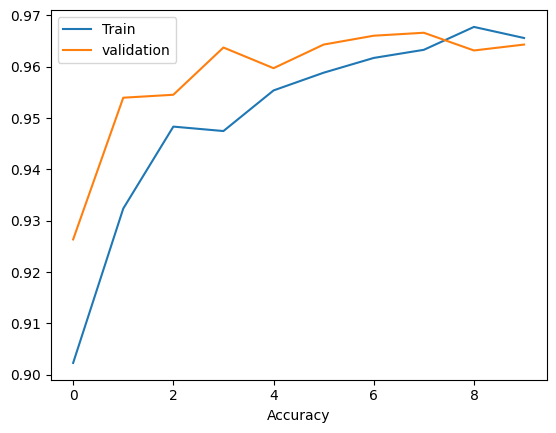

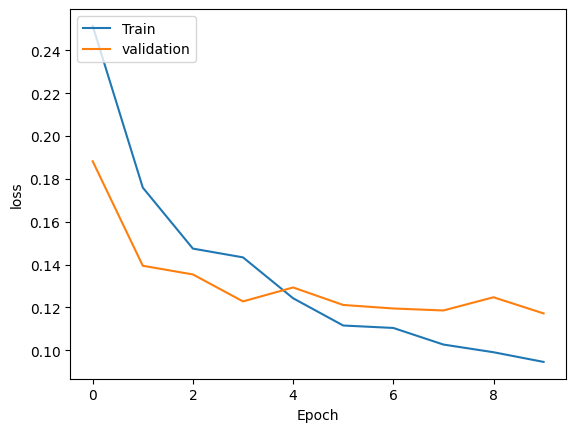

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [146]:
loss, accuracy = model.evaluate([tokenized_test_data["input_ids"], tokenized_test_data["attention_mask"]], test_labels, batch_size=8)
print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

272/272 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9632 - loss: 0.1129
테스트 손실: 0.1139
테스트 정확도: 0.9636


In [123]:
model.save('/content/drive/MyDrive/데이터과학/week14/KcELECTRA_model_bin.keras')

In [124]:
print(tokenizer.decode(tokenized_train_data["input_ids"][166]))

[CLS] 너내가 리그오브레전드를 정확히 알고 있다고 생각하지? 천만의말씀 1vㅣ제이벳1에서 더 많은것을 배워봐 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


예측

In [2]:
new_sentence = ["높은 배당 파격 행사 고속 환전 배당맛집.com"]

In [3]:
tokenized_new_data = tokenizer(
    new_sentence,
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors="tf"
)

NameError: name 'tokenizer' is not defined

In [149]:
print(tokenized_new_data["input_ids"])
print(tokenized_new_data["attention_mask"])
print(tokenizer.decode(tokenized_new_data["input_ids"][0]))

tf.Tensor(
[[    2 10651 22454 38829 12359 36869 44720 22454  4566  4121    18 10933
      3     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 128), dtype=int32)
tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 

In [ ]:
predict = model.predict([tokenized_new_data["input_ids"], tokenized_new_data["attention_mask"]])
print(predict)

In [1]:
score = float(predict[0][0])


if score > 0.5:
    print("{:.2f}% 확률로 스팸입니다.".format(score * 100))
else:
    print("{:.2f}% 확률로 스팸이 아닙니다.".format((1 - score) * 100))

NameError: name 'predict' is not defined